# Prepare dataset
 Use of ML for Regression on UV-data
 Paper: Phase–Property Diagrams for Multicomponent Oxide Systems toward Materials Libraries


In [1]:
# Load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def data_load(data_path : str, sheet : str, type = 'xlsx') -> pd.DataFrame:
    """Load the data"""
    if type == 'xlsx':
        df = pd.read_excel(data_path, sheet_name=sheet)
    elif type == 'csv':
        df = pd.read_csv(data_path, )
    return df

def data_recovery(df: pd.DataFrame) -> np.array:
    """Get the x-axis and y-axis"""
    data_x = df.iloc[:, ::2].T.to_numpy().astype(float)
    data_y = df[df.columns[1::2]].T.to_numpy().astype(float)
    return data_x, data_y

def verify_samples(df, label):
    n_samples = df.iloc[0,:].str.contains(label)
    return 

In [3]:
data_path = 'data/fluorite/All Data Band Gap 5 repetitions per sample-with all wells.xlsx'
sheet = 'Kubelka-Munk Trans.'
df_uv = data_load(data_path,sheet)

# Analizamos cuantas muestras se tienen

In [4]:
v_samples = np.zeros(107)
for i in range(1,107):
    label = 'Sample'+str(i)+'-'
    n_samples = pd.Series(df_uv.columns).str.contains(label)
    if n_samples.value_counts().shape[0]>1:
        v_samples[i] = int(n_samples.value_counts()[1])
np.unique(v_samples, return_counts=True)

(array([ 0.,  5., 25.]), array([  1, 105,   1], dtype=int64))

OBS: La ultima muestra tiene 25 repeticiones realizadas

In [5]:
data_x, data_y = data_recovery(df_uv)

In [6]:
data_x.shape

(560, 901)

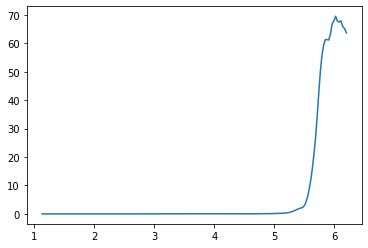

In [7]:
plt.plot(data_x[10],data_y[10])

In [8]:
data_path = 'data/fluorite/tabla de datos band gap.xlsx'
df_fl_bgap = data_load(data_path,'Sheet1')

In [9]:
df_fl_bgap['band gap']

0      5.718±0.004
1      4.828±0.011
2       5.208±0.01
3      3.376±0.003
4      2.468±0.038
          ...     
101    2.079±0.024
102    2.043±0.016
103    2.007±0.015
104     2.06±0.017
105    2.069±0.026
Name: band gap, Length: 106, dtype: object

## Target - Band Gap

['average', 'standard deviation']

In [10]:
bang_gap_fl = np.empty(shape=[df_fl_bgap.shape[0],2])
bang_gap_fl[:,0]=df_fl_bgap['band gap'].str.split("±").str[0]
bang_gap_fl[:,1]=df_fl_bgap['band gap'].str.split("±").str[1]
bang_gap_fl

array([[5.718e+00, 4.000e-03],
       [4.828e+00, 1.100e-02],
       [5.208e+00, 1.000e-02],
       [3.376e+00, 3.000e-03],
       [2.468e+00, 3.800e-02],
       [4.977e+00, 1.000e-03],
       [4.838e+00, 6.000e-03],
       [3.234e+00, 5.000e-03],
       [1.864e+00, 2.000e-02],
       [1.992e+00, 1.500e-02],
       [5.063e+00, 1.300e-02],
       [2.004e+00, 5.000e-03],
       [2.013e+00, 2.200e-02],
       [3.300e+00, 1.100e-02],
       [3.308e+00, 7.000e-03],
       [2.015e+00, 1.200e-02],
       [1.843e+00, 2.200e-02],
       [1.920e+00, 2.800e-02],
       [3.290e+00, 1.900e-02],
       [3.299e+00, 1.000e-02],
       [2.040e+00, 4.400e-02],
       [5.010e+00, 1.800e-02],
       [3.349e+00, 1.500e-02],
       [2.059e+00, 2.500e-02],
       [1.980e+00, 1.300e-02],
       [2.031e+00, 2.700e-02],
       [2.018e+00, 1.600e-02],
       [1.988e+00, 3.300e-02],
       [2.052e+00, 3.000e-02],
       [2.251e+00, 6.000e-03],
       [2.123e+00, 5.900e-02],
       [2.074e+00, 3.600e-02],
       [

In [11]:
bang_gap_fl.shape

(106, 2)

In [12]:
data_x.shape

(560, 901)

In [13]:
# Dejamos las muestras que sirven 106 y pro cad amuestra se realizaron 5 repeticiones
data_x = data_x[0:bang_gap_fl.shape[0]*5,:]
data_y = data_y[0:bang_gap_fl.shape[0]*5,:]

In [14]:
df_fluorite = pd.concat([pd.DataFrame({'x':data_x.tolist(), 'y': data_y.tolist()}),
pd.DataFrame({'band_gap_mean':bang_gap_fl[:,0].tolist(),'band_gap_std':bang_gap_fl[:,1]})], axis =1)
df_fluorite

,x,y,band_gap_mean,band_gap_std
0,"[1.12726309532197, 1.1282891794029504, 1.12931...","[0.0060821480926347695, 0.0037368379172620283,...",5.718,0.004
1,"[1.12726309532197, 1.1282891794029504, 1.12931...","[0.0029711356613742385, 0.00526027078130591, 0...",4.828,0.011
2,"[1.12726309532197, 1.1282891794029504, 1.12931...","[0.006912517453482746, 0.0014919367121750456, ...",5.208,0.010
3,"[1.12726309532197, 1.1282891794029504, 1.12931...","[0.000584220105284513, 0.0012678679192115099, ...",3.376,0.003
4,"[1.12726309532197, 1.1282891794029504, 1.12931...","[0.02162931471196681, 0.006063456275259739, 0....",2.468,0.038
...,...,...,...,...
525,"[1.1272693495638397, 1.1282958218178423, 1.129...","[0.017990257672501318, 0.0207421147172066, 0.0...",NaN,NaN
526,"[1.1272693495638397, 1.1282958218178423, 1.129...","[0.012789468742617965, 0.01073170945579353, 0....",NaN,NaN
527,"[1.1272693495638397, 1.1282958218178423, 1.129...","[0.006453451706984381, 0.009193232381175842, 0...",NaN,NaN
528,"[1.1272693495638397, 1.1282958218178423, 1.129...","[0.001983856795892142, 0.005797569886157499, 0...",NaN,NaN


In [85]:
# Tener presente que la ultima muestra repitio el experimento 10 veces
#np.savetxt('fluorite_x.csv', data_x, delimiter=',')
np.savetxt('fluorite_y.csv', data_y, delimiter=',')
np.savetxt('fluorite_bandgap.csv', bang_gap_fl, delimiter=',')
df_fluorite.to_csv('dataset_fluorite.csv')

# Data original

In [ ]:
data_path = 'data/data different heat treatments/FL1_800C_air.csv'

In [ ]:
df = data_load(data_path, '', 'csv')

C:\Users\Familia\AppData\Local\Temp\ipykernel_13336\1476385483.py:6: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,

In [16]:
# select only the data
df = df.iloc[1:902,0:802]

In [18]:
# X and y correct
n_samples = pd.Series(df.columns.str.contains('sample'))
n_samples.value_counts()

True     401
False    401
dtype: int64

In [49]:
df.iloc[:,0:2].to_csv('FL1_800C_air_correct.csv')

In [50]:
data_x, data_y = data_recovery(df)

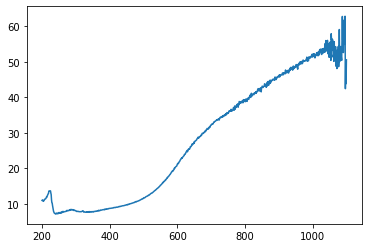

In [51]:
plt.plot(data_x[0], data_y[0])

In [52]:
def kubelka_munk_tr(x,y):
    x = 1240/x
    y = (((1-y/100)**2)/(2*(y/100)))*x**2
    return x,y

In [53]:
data_x_tr,data_y_tr = kubelka_munk_tr(data_x, data_y)

In [54]:
data_x_tr.shape

(401, 901)

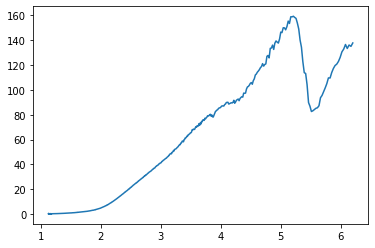

In [55]:
plt.plot(data_x_tr[0],data_y_tr[0])

In [63]:
data_path = 'data/data different heat treatments/FL1800C Data.xlsx'
df_ht_bgap = data_load(data_path, 'Band Gap', 'xlsx')
df_ht_bgap

,Band Gap Calculations (eV),Unnamed: 1,UV-VIS,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,S.NO.,Compositions,800C_Air,800C_Ar,800C_H2,800C_Air_RHT
1,Sample 1,CeLaSmPr,2.170473,3.199777,3.287863,2.241662
2,Sample 2,CeLaSmY,3.323952,3.326635,3.355462,3.285199
3,Sample 3,CeLaPrY,2.136291,3.233013,3.291325,2.219511
4,Sample 4,CeSmPrY,2.104155,3.170098,2.873513,2.1756
...,...,...,...,...,...,...
60,Sample 60,Ce La Sm Y Zr Tb,3.039371,3.357841,2.716942,3.212295
61,Sample 61,Ce La Pr Y Zr Tb,2.620708,3.321508,2.742024,2.995356
62,Sample 62,Ce Sm Pr Y Zr Tb,2.640127,3.331179,2.64709,2.972491
63,Sample 63,La Sm Pr Y Zr Tb,2.259953,3.737616,4.009851,2.345369


In [65]:
bang_gap_ht = df_ht_bgap['UV-VIS'].drop(0)
bang_gap_ht

1     2.170473
2     3.323952
3     2.136291
4     2.104155
5     2.107265
        ...   
60    3.039371
61    2.620708
62    2.640127
63    2.259953
64    2.128849
Name: UV-VIS, Length: 64, dtype: object

### Correct samples

Please consider upto sample 320 only, 5 iteration for each of the 64 samples. Rest samples were Cu and Zn oxides, which were later discarded. So we stopped the UV Vis any time after the 320th sample.

In [62]:
data_x_tr = data_x_tr[:,0:320]
data_y_tr = data_y_tr[:,0:320]

In [ ]:
np.savetxt('FL1800C_air_X.csv', data_x_tr, delimiter=',')
np.savetxt('FL1800C_air_y.csv', data_y_tr, delimiter=',')
np.savetxt('FL1800C_air_bandgap.csv', bang_gap_ht, delimiter=',')

## Upsampling

In [70]:
repetitions = 5
bang_gap_uv = bang_gap_ht.repeat(repetitions).values

In [71]:
# Let's make the Dataset
x = data_x_tr[0:len(bang_gap_uv)]
x

array([[1.12728349, 1.12830973, 1.1293386 , ..., 6.13822994, 6.16969192,
        6.20025118],
       [1.12728349, 1.12830973, 1.1293386 , ..., 6.13822994, 6.16969192,
        6.20025118],
       [1.12728349, 1.12830973, 1.1293386 , ..., 6.13822994, 6.16969192,
        6.20025118],
       ...,
       [1.12728349, 1.12830973, 1.1293386 , ..., 6.13822994, 6.16969192,
        6.20025118],
       [1.12728349, 1.12830973, 1.1293386 , ..., 6.13822994, 6.16969192,
        6.20025118],
       [1.12728349, 1.12830973, 1.1293386 , ..., 6.13822994, 6.16969192,
        6.20025118]])